# Question 1

**What is Simple Linear Regression?**

Simple Linear Regression is a statistical method used to model the linear relationship between a single independent variable (X) and a dependent variable (Y). The model assumes that Y can be expressed as a linear function of X plus an error term: \(Y = \beta_0 + \beta_1 X + \epsilon\), where \(\beta_0\) is the intercept, \(\beta_1\) is the slope (effect of X on Y), and \(\epsilon\) is the random error term. The goal is to estimate \(\beta_0\) and \(\beta_1\) so that predictions of Y for given X are as accurate as possible (typically by minimizing mean squared error).

# Question 2

**What are the key assumptions of Simple Linear Regression?**

1. **Linearity**: The relationship between X and the expected value of Y is linear.
2. **Independence**: Observations (and errors) are independent of each other.
3. **Homoscedasticity**: The variance of errors is constant across values of X (no heteroscedasticity).
4. **Normality of errors**: For inference (confidence intervals, hypothesis tests), errors are assumed to be normally distributed (especially important for small samples).
5. **No perfect multicollinearity**: (Applies to multiple regression) predictors are not perfect linear combinations of each other.
6. **Correct model specification**: The model includes the relevant predictors and functional form (no important omitted variables or wrong functional form).

# Question 3

**What is heteroscedasticity, and why is it important to address in regression models?**

Heteroscedasticity occurs when the variance of the residuals (errors) is not constant across all levels of the independent variable(s). In other words, the spread of residuals changes with X or predicted Y.

**Why address it?**
- It invalidates standard OLS inference: ordinary least squares (OLS) estimates of coefficients remain unbiased, but the standard errors will be incorrect, which makes confidence intervals and hypothesis tests unreliable.
- It can indicate model misspecification (e.g., missing variables or wrong functional form) or data issues.

**How to detect & address**:
- Detect: residuals vs fitted plot, Breusch–Pagan test, White test.
- Address: transform the dependent variable (e.g., log), use weighted least squares (WLS), or use heteroscedasticity-robust (White) standard errors.

# Question 4

**What is Multiple Linear Regression?**

Multiple Linear Regression extends simple linear regression to include two or more independent variables. The model is: \(Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon\). It estimates the effect of each predictor on Y while holding the other predictors constant. This allows modeling more complex relationships and controlling for confounders.

# Question 5

**What is polynomial regression, and how does it differ from linear regression?**

Polynomial regression models the relationship between the independent variable X and the dependent variable Y as an nth-degree polynomial in X. For example, a 2nd-degree (quadratic) polynomial regression models \(Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon\).

Although polynomial regression is called "polynomial", it is still a linear model in terms of the coefficients (linear in parameters). The difference from simple linear regression is that polynomial regression can capture non-linear relationships between X and Y by including powers of X as additional predictors.

Key point: Polynomial regression remains solvable with linear regression techniques after creating the polynomial features (e.g., X, X^2, X^3...).

Estimated intercept (beta_0): 0.1800
Estimated slope (beta_1): 1.9800


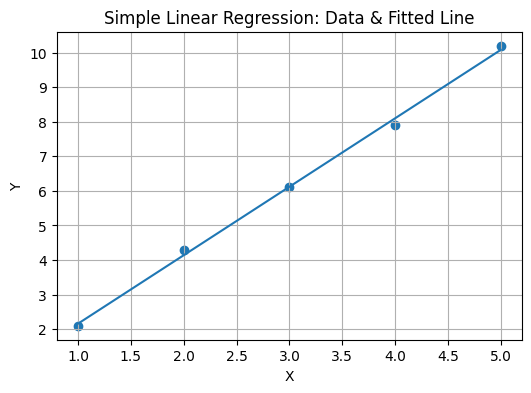

In [1]:
# Question 6: Simple Linear Regression on sample data and plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.1,4.3,6.1,7.9,10.2])

model = LinearRegression()
model.fit(X, Y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Estimated intercept (beta_0): {intercept:.4f}")
print(f"Estimated slope (beta_1): {slope:.4f}")

# Predictions for plotting
X_plot = np.linspace(1,5,100).reshape(-1,1)
Y_plot = model.predict(X_plot)

plt.figure(figsize=(6,4))
plt.scatter(X, Y)
plt.plot(X_plot, Y_plot)
plt.title('Simple Linear Regression: Data & Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [2]:
# Question 7: Multiple Linear Regression and VIF
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Area = [1200,1500,1800,2000]
Rooms = [2,3,3,4]
Price = [250000,300000,320000,370000]

df = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})
X = df[['Area','Rooms']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

print('Coefficients:')
for name, coef in zip(X.columns, model.coef_):
    print(f'  {name}: {coef:.6f}')
print(f'Intercept: {model.intercept_:.6f}')

# Compute VIF manually
from sklearn.linear_model import LinearRegression

def compute_vif(df_X):
    vif_vals = {}
    for col in df_X.columns:
        X_other = df_X.drop(columns=[col])
        y_col = df_X[col]
        lr = LinearRegression()
        lr.fit(X_other, y_col)
        r2 = lr.score(X_other, y_col)
        if r2 >= 1.0:
            vif = float('inf')
        else:
            vif = 1.0 / (1.0 - r2)
        vif_vals[col] = vif
    return vif_vals

vif = compute_vif(X)
print('\nVariance Inflation Factors (VIF):')
for k,v in vif.items():
    print(f'  {k}: {v:.4f}')

print('\nInterpretation:')
print(' - VIF near 1 indicates little multicollinearity. VIF > 5 (or >10) indicates problematic multicollinearity.')


Coefficients:
  Area: 63.157895
  Rooms: 34736.842105
Intercept: 103157.894737

Variance Inflation Factors (VIF):
  Area: 7.7368
  Rooms: 7.7368

Interpretation:
 - VIF near 1 indicates little multicollinearity. VIF > 5 (or >10) indicates problematic multicollinearity.


Polynomial coefficients (for X and X^2):
  X: 1.940000
  X^2: 0.200000
Intercept: 0.060000


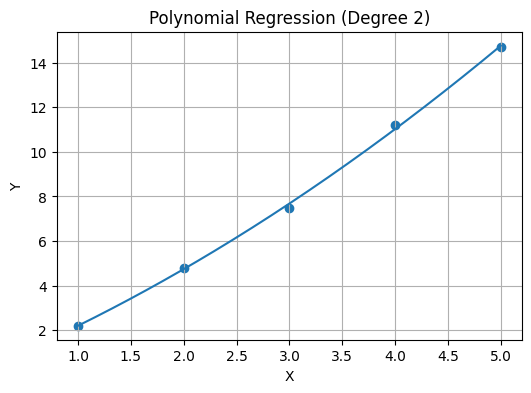

In [3]:
# Question 8: Polynomial regression (2nd-degree)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2,4.8,7.5,11.2,14.7])

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

print('Polynomial coefficients (for X and X^2):')
for name, coef in zip(['X','X^2'], model.coef_):
    print(f'  {name}: {coef:.6f}')
print(f'Intercept: {model.intercept_:.6f}')

# Plot
X_plot = np.linspace(1,5,200).reshape(-1,1)
X_plot_poly = poly.transform(X_plot)
Y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(6,4))
plt.scatter(X, Y)
plt.plot(X_plot, Y_plot)
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


Predictions: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


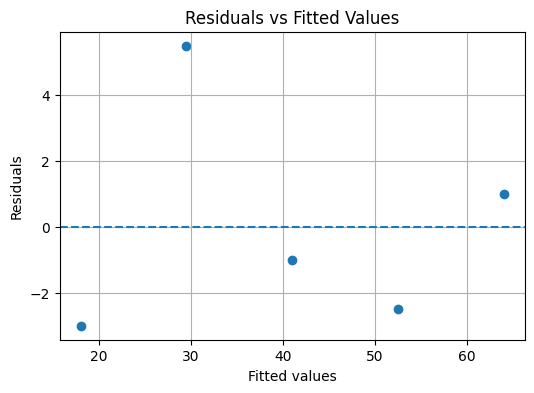


Assessment:
 - If residuals show increasing or decreasing spread with fitted values, that suggests heteroscedasticity.
 - With this small sample, conclusions are tentative; formal tests (Breusch–Pagan) would be more rigorous.


In [4]:
# Question 9: Residuals plot and heteroscedasticity assessment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15,35,40,50,65])

model = LinearRegression()
model.fit(X, Y)

preds = model.predict(X)
residuals = Y - preds

print('Predictions:', preds)
print('Residuals:', residuals)

plt.figure(figsize=(6,4))
plt.scatter(preds, residuals)
plt.axhline(0, linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Simple visual assessment:
print('\nAssessment:')
print(' - If residuals show increasing or decreasing spread with fitted values, that suggests heteroscedasticity.')
print(' - With this small sample, conclusions are tentative; formal tests (Breusch–Pagan) would be more rigorous.')


# Question 10

**Scenario:** You're a data scientist predicting house prices using area, number of rooms, and location, but you detect heteroscedasticity and multicollinearity.

**Steps to address these issues and ensure a robust model (serialwise):**

1. **Diagnose and quantify**:
   - For heteroscedasticity: inspect residuals vs fitted plot, run Breusch–Pagan or White test.
   - For multicollinearity: compute VIF (Variance Inflation Factor) for predictors, examine correlation matrix.

2. **Address multicollinearity**:
   - If two features are highly collinear (e.g., area and number of rooms), consider:
     - Dropping one of the correlated variables (if it adds little predictive power).
     - Combining them into a single feature (e.g., price per room or area per room).
     - Using dimensionality reduction (PCA) to create orthogonal components.
     - Using regularized regression (Ridge or Lasso) which penalizes large coefficients and mitigates multicollinearity.

3. **Address heteroscedasticity**:
   - Transform the dependent variable (e.g., apply log to Price) to stabilize variance.
   - Use Weighted Least Squares (WLS) if you can model the variance structure (weights inversely proportional to variance).
   - Use robust (heteroscedasticity-consistent) standard errors for inference (e.g., White's robust SEs) if you keep OLS estimates.

4. **Feature engineering & model improvements**:
   - Include important predictors (e.g., location encoded properly using dummies or target encoding, age of property, amenities) to reduce omitted-variable bias which can manifest as heteroscedasticity.
   - Consider interaction terms or non-linear transformations if relationships are non-linear.

5. **Model selection & regularization**:
   - Use cross-validation to evaluate model generalization.
   - Prefer regularized models (Ridge/Lasso/ElasticNet) if multicollinearity is present.

6. **Validation & interpretation**:
   - After corrections, re-check residual diagnostics and VIF.
   - Use appropriate error metrics (RMSE, MAE) on a hold-out set.

7. **Communicate**:
   - Report model limitations, explain any transformations (e.g., log-price) and how to interpret coefficients after transformation.

